# Factors Influencing Salaries of Data Science Roles

## Table of Contents

- [Factors Influencing Salaries of Data Science Roles](#factors-influencing-salaries-of-data-science-roles)
  - [Table of Contents](#table-of-contents)
  - [Data Exploration](#data-exploration)
    - [Dataset Overview](#dataset-overview)
      - [Work Year](#work-year)
      - [Experience Level](#experience-level)
      - [Employment Type](#employment-type)
      - [Job Title](#job-title)
      - [Countries](#countries)
    - [Key Insights](#key-insights)
      - [Salary Distribution](#salary-distribution)
      - [Salary by Experience Level](#salary-by-experience-level)
      - [Salary by Job Titles](#salary-by-job-titles)
      - [Salary by Employees Region and Company Location](#salary-by-employees-region-and-company-location)
      - [Salary by Company Location and Company Size](#salary-by-company-location-and-company-size)
      - [Salary by Remote Ratio](#salary-by-remote-ratio)
      - [Remote Ratio by Experience Level](#remote-ratio-by-experience-level)
  - [Data Preparation and Model Training](#data-preparation-and-model-training)
    - [Feature Selection](#feature-selection)
    - [Handling Data Issues](#handling-data-issues)
      - [Employment Type Issues](#employment-type-issues)
      - [Job Titles Issues](#job-titles-issues)
    - [Model Training and Performance](#model-training-and-performance)
      - [Supervised Learning](#supervised-learning)
        - [Features Importance](#features-importance)
      - [Unsupervised Learning](#unsupervised-learning)


## Data Exploration

### Dataset Overview

The dataset contains **1500 rows** and **11 columns**.

In [515]:
import pandas as pd

salaries_data_frame = pd.read_csv("data/jobs_salaries_2023.csv")
print(salaries_data_frame.shape)

(1500, 11)


#### Work Year

Most of the job records come from recent years:  
- **2022** has the largest share with ~48% of entries.  
- **2023** follows with ~33%.  
- Earlier years (**2020–2021**) make up a much smaller portion (~20% combined).  

This shows the dataset is heavily skewed toward more recent data.

In [516]:
# Count occurrences of each work_year and sort by year
work_year_counts = salaries_data_frame["work_year"].value_counts().sort_index()

# Calculate percentages
work_year_percent = (work_year_counts / work_year_counts.sum() * 100).round(2)

# Combine into one DataFrame for display
result = pd.DataFrame({"count": work_year_counts, "percentage": work_year_percent})

print(result)

           count  percentage
work_year                   
2020          75         5.0
2021         219        14.6
2022         714        47.6
2023         492        32.8


#### Experience Level

Experience levels in the dataset are unevenly distributed:  
- **Senior (SE)** roles dominate, making up **61.5%** of all records.  
- **Mid-level (MI)** roles account for **23.6%**.  
- **Entry-level (EN)** roles represent **11.0%**.  
- **Executive (EX)** roles are rare, with only **3.9%**.  

➡️ The data is heavily skewed toward **senior positions**, with relatively few executives.

In [517]:
# Define the correct order of experience levels
level_order = ["EN", "MI", "SE", "EX"]

# Convert to categorical with specified order
salaries_data_frame["experience_level"] = pd.Categorical(
    salaries_data_frame["experience_level"], categories=level_order, ordered=True
)

# Count occurrences in the specified order
experience_level_counts = salaries_data_frame["experience_level"].value_counts().sort_index()

# Calculate percentages
experience_level_percent = (
    experience_level_counts / experience_level_counts.sum() * 100
).round(1)

# Combine into a DataFrame
result = pd.DataFrame(
    {"count": experience_level_counts, "percentage": experience_level_percent}
)
result

,count,percentage
experience_level,,
EN,167,11.1
MI,353,23.5
SE,922,61.5
EX,58,3.9


#### Employment Type

Employment type distribution:  
- **Full-time (FT)** dominates with **98.2%** of all records, showing that almost all roles are full-time.  
- **Part-time (PT)**, **Contract (CT)**, and **Freelance (FL)** together make up less than **2%** of the dataset.  

➡️ The dataset is overwhelmingly focused on **full-time employment**.

In [518]:
# Define custom order
order = ["FL", "CT", "PT", "FT"]

# Count occurrences of each employment_type
employment_type_counts = salaries_data_frame["employment_type"].value_counts()

# Reorder according to the custom order
employment_type_counts = employment_type_counts.reindex(order)

# Calculate percentages
employment_type_percent = (
    employment_type_counts / employment_type_counts.sum() * 100
).round(2)

# Combine into one DataFrame
result = pd.DataFrame(
    {"count": employment_type_counts, "percentage": employment_type_percent}
)

print(result)

                 count  percentage
employment_type                   
FL                   6         0.4
CT                   9         0.6
PT                  12         0.8
FT                1473        98.2


#### Job Title

The dataset contains **69 unique job titles**.  

- The most common roles are **Data Engineer (24.4%)**, **Data Scientist (24.0%)**, and **Data Analyst (14.0%)**.  
- Together, these three account for over **60%** of all records.  
- Roles like **Machine Learning Engineer (7.1%)** are present in smaller numbers, while many niche titles appear only once.  
- When grouped, about **30.5%** of jobs fall into the "Others" category, highlighting a long tail of less frequent roles.  

➡️ The dataset is dominated by core data roles, while specialized or managerial positions are relatively rare.

In [519]:
import pandas as pd

# Number of unique job titles
num_unique_jobs = salaries_data_frame["job_title"].nunique()
print(f"Number of unique job titles: {num_unique_jobs}")

# Count all job titles
job_counts = salaries_data_frame["job_title"].value_counts()

# Total count for percentages
total_jobs = job_counts.sum()

# Top 20 most common job titles with percentage
print("\nTop 20 job titles:")
top_20 = job_counts.head(20).to_frame("count")
top_20["percentage"] = (top_20["count"] / total_jobs * 100).round(2)
print(top_20)

# Last 20 job titles (least common) with percentage
print("\nLast 20 job titles:")
last_20 = job_counts.tail(20).to_frame("count")
last_20["percentage"] = (last_20["count"] / total_jobs * 100).round(2)
print(last_20)

# =============================
# Group into major roles vs. others
# =============================
# Set threshold (e.g., 5% of total)
threshold = 0.05 * total_jobs

# Split into major roles and "Others"
major_roles = job_counts[job_counts >= threshold]
other_roles = job_counts[job_counts < threshold]

# Combine into final series
job_counts_grouped = major_roles.copy()
job_counts_grouped["Others"] = other_roles.sum()

# Calculate percentages
job_percent = (job_counts_grouped / job_counts_grouped.sum() * 100).round(2)

# Create final DataFrame
result = pd.DataFrame({"count": job_counts_grouped, "percentage": job_percent})

print("\nSummary (Grouped):")
print(result)

Number of unique job titles: 69

Top 20 job titles:
                                    count  percentage
job_title                                            
Data Engineer                         366       24.40
Data Scientist                        360       24.00
Data Analyst                          210       14.00
Machine Learning Engineer             106        7.07
Analytics Engineer                     53        3.53
Data Architect                         39        2.60
Applied Scientist                      30        2.00
Data Science Manager                   29        1.93
Research Scientist                     27        1.80
Machine Learning Scientist             17        1.13
Research Engineer                      14        0.93
Computer Vision Engineer               12        0.80
ML Engineer                            12        0.80
Data Analytics Manager                 11        0.73
BI Data Analyst                        10        0.67
AI Scientist                  

#### Countries

To enrich the dataset, we merged a **country-to-region mapping**.  
- Each employee’s residence country (`employee_residence`) was mapped to a broader **employee_region**.  
- Each company’s location (`company_location`) was mapped to a broader **company_region**.  

After the merge, the dataset now includes two new columns:  
- **employee_region** – the region where the employee lives  
- **company_region** – the region where the company is based  

➡️ This allows for regional-level analysis of workforce distribution and salary patterns.

In [520]:
import pandas as pd

# Load country-region mapping
country_mapping = pd.read_csv("data/countries.csv")  # the CSV you provided

# Merge mapping for employee residence
salaries_data_frame = salaries_data_frame.merge(
    country_mapping[["code", "region"]].rename(
        columns={"code": "employee_residence", "region": "employee_region"}
    ),
    on="employee_residence",
    how="left",
)

# Merge mapping for company location
salaries_data_frame = salaries_data_frame.merge(
    country_mapping[["code", "region"]].rename(
        columns={"code": "company_location", "region": "company_region"}
    ),
    on="company_location",
    how="left",
)

# Now salaries_data_frame has employee_region and company_region columns
print(salaries_data_frame.head())

   work_year experience_level employment_type                 job_title    salary salary_currency  salary_in_usd employee_residence  remote_ratio company_location company_size employee_region  company_region
0       2023               SE              FT  Principal Data Scientist   80000.0             EUR        85847.0                 ES           100               ES            L  Western Europe  Western Europe
1       2023               MI              CT               ML Engineer   30000.0             USD        30000.0                 US           100               US            S   North America   North America
2       2023               MI              CT               ML Engineer   25500.0             USD        25500.0                 US           100               US            S   North America   North America
3       2023               SE              FT            Data Scientist  175000.0             USD       175000.0                 CA           100               CA      

#### Remote Ratio

In [521]:
# Define custom order
order = [0, 50, 100]

# Count occurrences of each remote_ratio
remote_ratio_counts = salaries_data_frame["remote_ratio"].value_counts()

# Reorder according to the custom order
remote_ratio_counts = remote_ratio_counts.reindex(order)

# Calculate percentages
remote_ratio_percent: float = (
    remote_ratio_counts / remote_ratio_counts.sum() * 100
).round(2)

# Combine into one DataFrame
result = pd.DataFrame(
    {"count": remote_ratio_counts, "percentage": remote_ratio_percent}
)

result

,count,percentage
remote_ratio,,
0,579,38.60
50,130,8.67
100,791,52.73


#### Company Size

In [522]:
# Define custom order
order = ["S", "M", "L"]

# Count occurrences of each company_size
company_size_counts = salaries_data_frame["company_size"].value_counts()

# Reorder according to the custom order
company_size_counts = company_size_counts.reindex(order)

# Calculate percentages
company_size_percent: float = (company_size_counts / company_size_counts.sum() * 100).round(2)

# Combine into one DataFrame
result = pd.DataFrame(
    {"count": company_size_counts, "percentage": company_size_percent}
)

result

,count,percentage
company_size,,
S,107,7.13
M,1073,71.53
L,320,21.33


### Key Insights

#### Salary Distribution

The salary distribution in the dataset shows a **wide range**, spanning from **$5,409** at the lowest to **$450,000** at the highest.  

- **Mean salary:** $130,934  
- **Median salary:** $130,000  
- **Skewness:** 0.59  

The closeness of the mean and median suggests that the distribution is relatively balanced, with no extreme distortion caused by outliers.  

The **skewness value of 0.59** indicates a **moderate positive skew**, meaning:  

- Salaries are more clustered toward the lower end of the scale.  
- A smaller number of very high salaries pull the average upward.  

In practical terms, most professionals earn closer to the median, but a select group commands significantly higher pay, contributing to the extended right tail of the distribution.  

Salary ranges from $5,409 to $450,000
Mean salary: $130,934
Median salary: $130,000
Skewness: 0.59


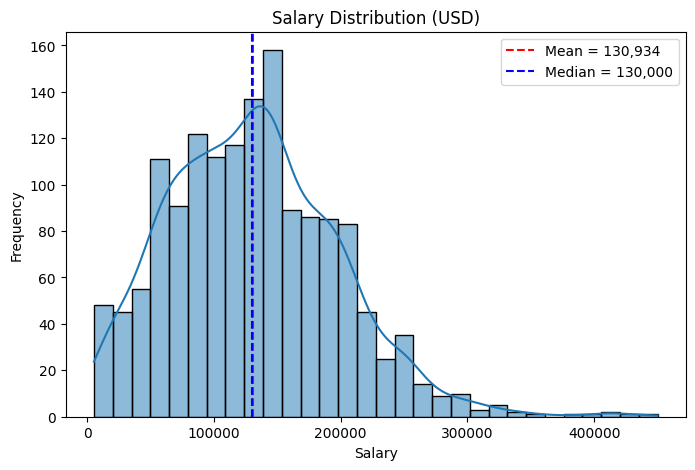

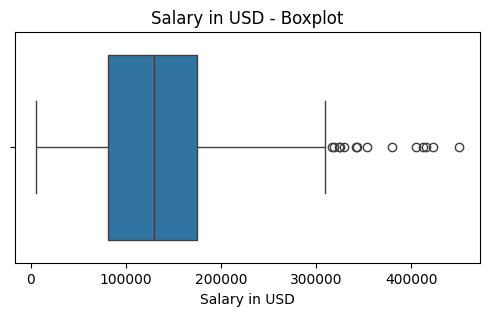

In [523]:
import matplotlib.pyplot as plt
import seaborn as sns


salary_in_usd_series = salaries_data_frame["salary_in_usd"]


# --- 1. Descriptive statistics ---
mean_salary = salary_in_usd_series.mean()
median_salary = salary_in_usd_series.median()
min_salary = salary_in_usd_series.min()
max_salary = salary_in_usd_series.max()


print(f"Salary ranges from ${min_salary:,.0f} to ${max_salary:,.0f}")
print(f"Mean salary: ${mean_salary:,.0f}")
print(f"Median salary: ${median_salary:,.0f}")


# Skew check
skewness = salary_in_usd_series.skew()
print(f"Skewness: {skewness:.2f}")


# --- 2. Histogram ---
plt.figure(figsize=(8, 5))
sns.histplot(salary_in_usd_series, bins=30, kde=True)
plt.axvline(
    mean_salary, color="red", linestyle="--", label=f"Mean = {mean_salary:,.0f}"
)
plt.axvline(
    median_salary, color="blue", linestyle="--", label=f"Median = {median_salary:,.0f}"
)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# --- 3. Boxplot (to reveal outliers) ---
plt.figure(figsize=(6, 3))
sns.boxplot(x=salary_in_usd_series)
plt.title("Salary in USD - Boxplot")
plt.xlabel("Salary in USD")
plt.show()

#### Salary by Experience Levels

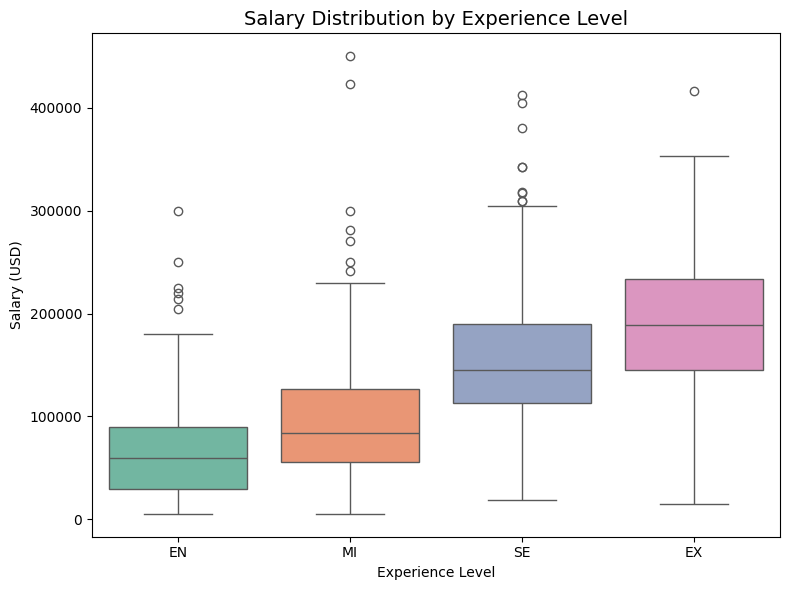

In [524]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure correct order of experience levels
experience_level_order = ["EN", "MI", "SE", "EX"]
salaries_data_frame["experience_level"] = pd.Categorical(
    salaries_data_frame["experience_level"], categories=experience_level_order, ordered=True
)

plt.figure(figsize=(8, 6))

sns.boxplot(
    data=salaries_data_frame,
    x="experience_level",
    y="salary_in_usd",
    order=experience_level_order,
    palette="Set2",
    hue="experience_level",
    legend=False,
)

plt.title("Salary Distribution by Experience Level", fontsize=14)
plt.ylabel("Salary (USD)")
plt.xlabel("Experience Level")
plt.tight_layout()
plt.show()

#### Salary by Job Titles

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_65390/629424665.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


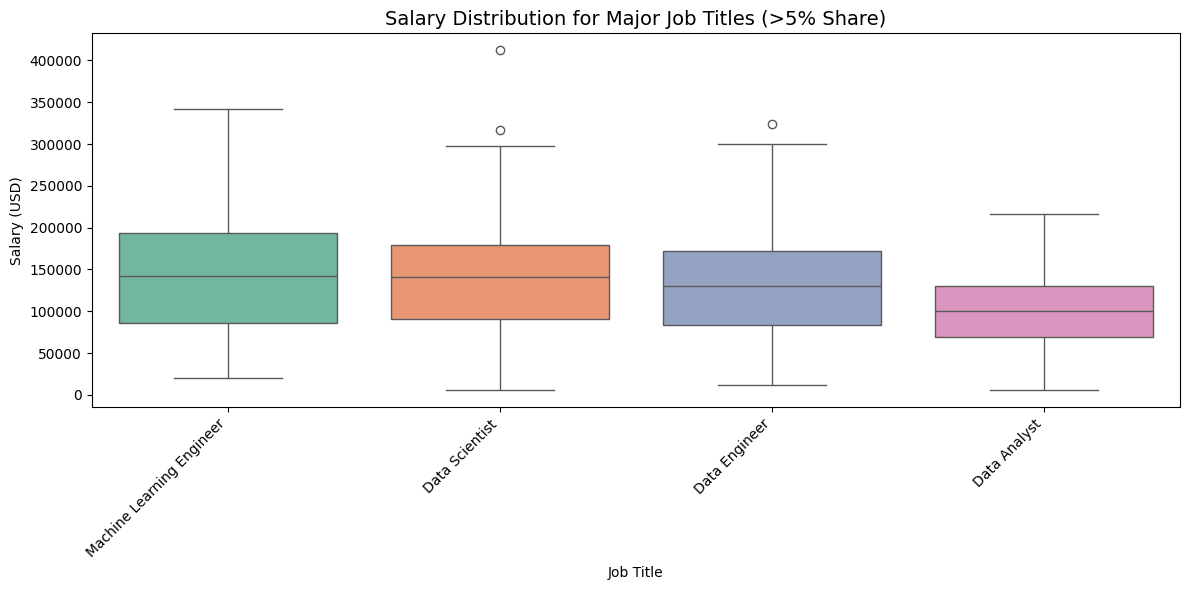

In [525]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count job titles
job_counts = salaries_data_frame["job_title"].value_counts()

# Threshold (5%)
threshold = 0.05 * job_counts.sum()
major_roles = job_counts[job_counts >= threshold].index

# Filter dataframe to include only major roles
salaries_data_frame_major_roles = salaries_data_frame[salaries_data_frame["job_title"].isin(major_roles)]

# Sort job titles by median salary
job_order = (
    salaries_data_frame_major_roles.groupby("job_title")["salary_in_usd"]
    .median()
    .sort_values(ascending=False)
    .index
)

# Boxplot: Salary distribution by sorted job titles
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=salaries_data_frame_major_roles,
    x="job_title",
    y="salary_in_usd",
    palette="Set2",
    order=job_order,
)

plt.xticks(rotation=45, ha="right")
plt.title("Salary Distribution for Major Job Titles (>5% Share)", fontsize=14)
plt.ylabel("Salary (USD)")
plt.xlabel("Job Title")
plt.tight_layout()
plt.show()

#### Salary by Employees Region and Company Location

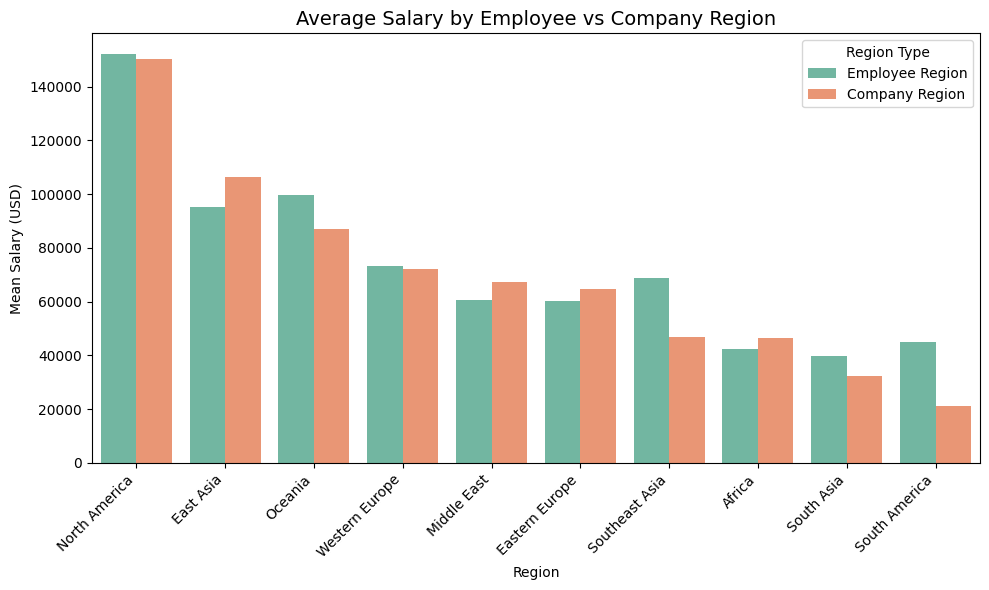

In [526]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Prepare data: mean salary by employee & company region ---
employee_region_salary = (
    salaries_data_frame.groupby("employee_region")["salary_in_usd"].mean().reset_index()
)
employee_region_salary["type"] = "Employee Region"

company_region_salary = (
    salaries_data_frame.groupby("company_region")["salary_in_usd"].mean().reset_index()
)
company_region_salary.rename(columns={"company_region": "region"}, inplace=True)
company_region_salary["type"] = "Company Region"

employee_region_salary.rename(columns={"employee_region": "region"}, inplace=True)

# Combine into one dataframe
region_salary = pd.concat([employee_region_salary, company_region_salary])

# Sort regions by overall mean salary
region_order = (
    region_salary.groupby("region")["salary_in_usd"]
    .mean()
    .sort_values(ascending=False)
    .index
)

# --- Plot: Grouped bar chart ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=region_salary,
    x="region",
    y="salary_in_usd",
    hue="type",
    order=region_order,
    palette="Set2",
)

plt.xticks(rotation=45, ha="right")
plt.title("Average Salary by Employee vs Company Region", fontsize=14)
plt.ylabel("Mean Salary (USD)")
plt.xlabel("Region")
plt.legend(title="Region Type")
plt.tight_layout()
plt.show()

#### Salary by Company Location and Company Size

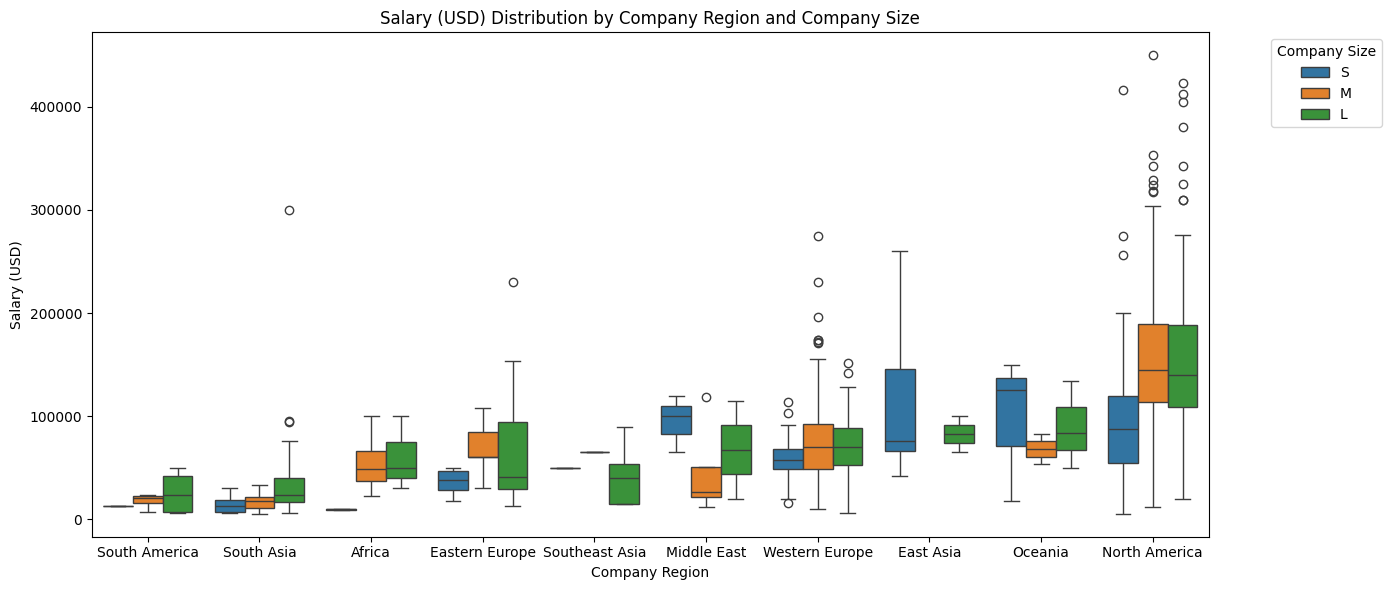

In [527]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute median salary per region for sorting
region_order = (
    salaries_data_frame.groupby("company_region")["salary_in_usd"].median().sort_values().index
)

# Convert company_region to categorical with the sorted order
salaries_data_frame["company_region"] = pd.Categorical(
    salaries_data_frame["company_region"], categories=region_order, ordered=True
)

# Optional: set category order for company size
size_order = ["S", "M", "L"]

# Draw box plot with region on X-axis and company size as hue
plt.figure(figsize=(14, 6))
sns.boxplot(
    x="company_region",
    y="salary_in_usd",
    hue="company_size",
    data=salaries_data_frame,
    hue_order=size_order,
)

plt.title("Salary (USD) Distribution by Company Region and Company Size")
plt.xlabel("Company Region")
plt.ylabel("Salary (USD)")
plt.legend(
    title="Company Size", bbox_to_anchor=(1.05, 1), loc="upper left"
)  # move legend outside
plt.tight_layout()
plt.show()

#### Salary by Remote Ratio

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_65390/1667619841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=salaries_data_frame, x="remote_ratio", y="salary_in_usd", palette="Set2")


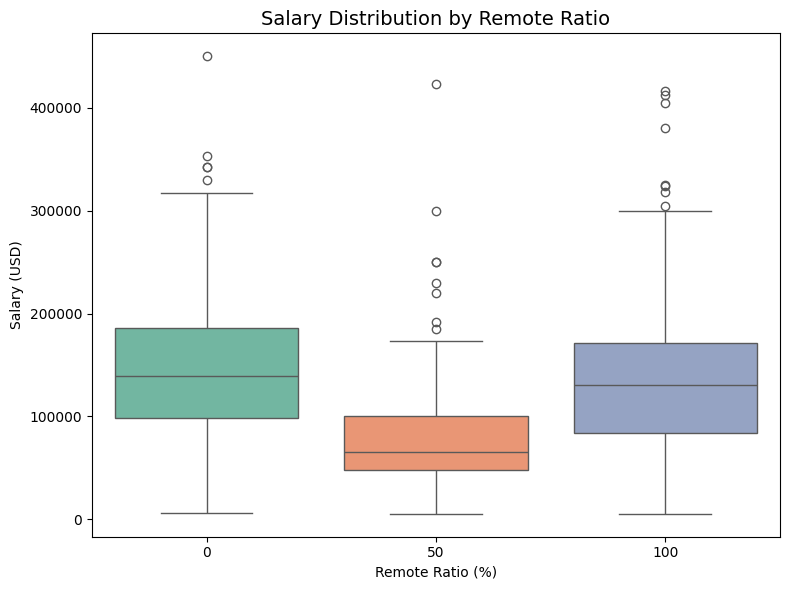

In [528]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=salaries_data_frame, x="remote_ratio", y="salary_in_usd", palette="Set2")

plt.title("Salary Distribution by Remote Ratio", fontsize=14)
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.show()

#### Remote Ratio by Experience Levels

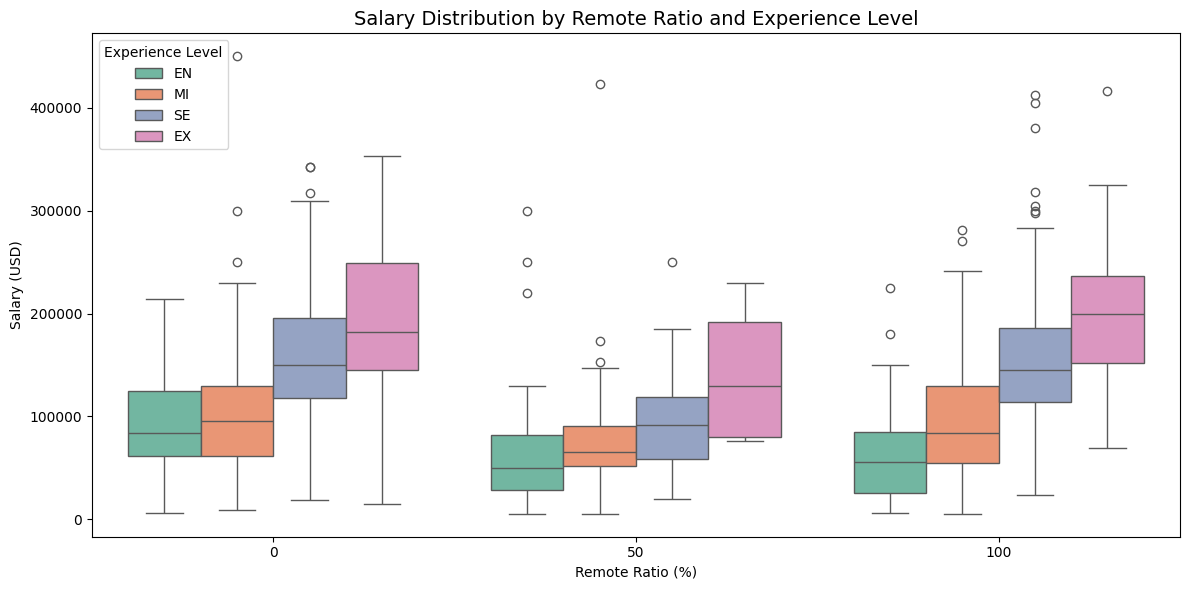

In [529]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=salaries_data_frame,
    x="remote_ratio",
    y="salary_in_usd",
    hue="experience_level",  # add experience levels
    palette="Set2",
)

plt.title("Salary Distribution by Remote Ratio and Experience Level", fontsize=14)
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary (USD)")
plt.legend(title="Experience Level")
plt.tight_layout()
plt.show()

## Data Preparation and Model Training

### Feature Selection

To analyze factors influencing salaries, the following features were chosen because they capture key dimensions of workforce experience, role, and organizational context:  

1. **experience_level**  
   - Represents the seniority of employees (e.g., entry-level, mid-level, senior, executive).  
   - Salary is strongly influenced by professional experience and career stage, making this feature critical.  

2. **job_title**  
   - Captures the specific role or specialization (e.g., Data Scientist, Engineer, Analyst).  
   - Different job functions within data-related fields command significantly different salary bands, reflecting market demand and skill requirements.  

3. **employee_residence**  
   - Indicates where the employee is located.  
   - Salaries are often adjusted for cost of living, regional demand, and local market conditions, making geographic context important.  

4. **company_location**  
   - Refers to the country where the company is based.  
   - Employers headquartered in different countries may follow distinct compensation structures, taxation systems, and labor policies, all of which impact pay.  

5. **company_size**  
   - Classifies companies as small, medium, or large.  
   - Larger firms often have more resources and standardized pay scales, while smaller companies may offer lower salaries but compensate with flexibility or benefits.  

6. **remote_ratio**  
   - Measures the degree of remote work allowed (on-site, hybrid, or fully remote).  
   - Remote work opportunities can influence salaries: some companies adjust pay for remote employees, while others maintain uniform rates regardless of location.  

Together, these features were selected because they reflect the **individual’s role and experience**, **geographic and organizational factors**, and **work arrangements** — all of which are known to shape salary outcomes.  


### Handling Data Issues

#### Missing Values Issues

In [530]:
# Drop rows with any missing values
salaries_data_frame = salaries_data_frame.dropna()
salaries_data_frame.shape

(1494, 13)

#### Employment Type Issues

In [531]:
# Keep only full-time employees
salaries_data_frame = salaries_data_frame[salaries_data_frame["employment_type"] == "FT"]  # assuming "FT" is the code for full-time
salaries_data_frame.shape

(1467, 13)

#### Job Titles Issues

In [532]:
# ===== FILTER OUT JOB TITLES WITH FEWER THAN 100 RECORDS (Less than 5%) =====
job_counts = salaries_data_frame["job_title"].value_counts()
salaries_data_frame = salaries_data_frame[salaries_data_frame["job_title"].isin(job_counts[job_counts >= 100].index)]
salaries_data_frame.shape

(1030, 13)

#### Salary Distribution after Filter

Salary ranges from $5,679 to $412,000
Mean salary: $128,589
Median salary: $129,300
Skewness: 0.43


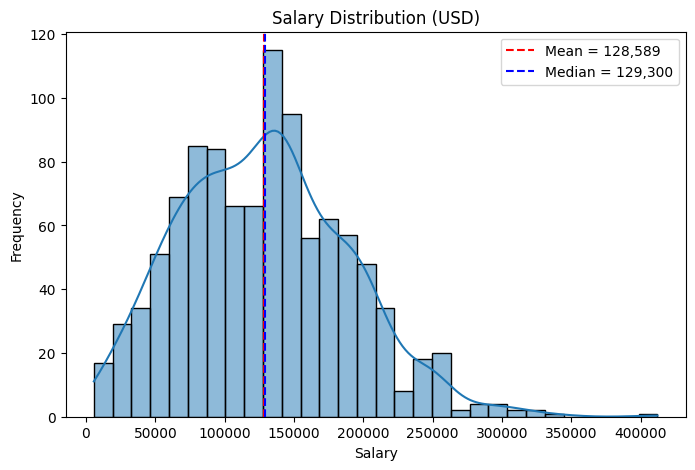

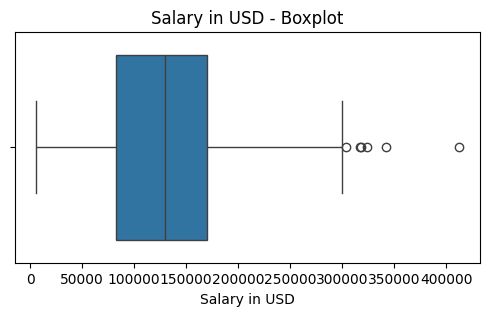


Number of outliers: 6
Outlier rows:
      work_year experience_level employment_type                  job_title    salary salary_currency  salary_in_usd employee_residence  remote_ratio company_location company_size employee_region company_region
358        2023               SE              FT  Machine Learning Engineer  304000.0             USD       304000.0                 US           100               US            M   North America  North America
488        2023               SE              FT             Data Scientist  317070.0             USD       317070.0                 US             0               US            M   North America  North America
145        2023               SE              FT  Machine Learning Engineer  318300.0             USD       318300.0                 US           100               US            M   North America  North America
1155       2022               EX              FT              Data Engineer  324000.0             USD       324000.0   

In [533]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Descriptive statistics ---
salary_in_usd_series = salaries_data_frame["salary_in_usd"]

mean_salary = salary_in_usd_series.mean()
median_salary = salary_in_usd_series.median()
min_salary = salary_in_usd_series.min()
max_salary = salary_in_usd_series.max()

print(f"Salary ranges from ${min_salary:,.0f} to ${max_salary:,.0f}")
print(f"Mean salary: ${mean_salary:,.0f}")
print(f"Median salary: ${median_salary:,.0f}")

# Skew check
skewness = salary_in_usd_series.skew()
print(f"Skewness: {skewness:.2f}")


# --- 2. Histogram ---
plt.figure(figsize=(8, 5))
sns.histplot(salary_in_usd_series, bins=30, kde=True)
plt.axvline(
    mean_salary, color="red", linestyle="--", label=f"Mean = {mean_salary:,.0f}"
)
plt.axvline(
    median_salary, color="blue", linestyle="--", label=f"Median = {median_salary:,.0f}"
)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# --- 3. Boxplot (to reveal outliers) ---
plt.figure(figsize=(6, 3))
sns.boxplot(x=salary_in_usd_series)
plt.title("Salary in USD - Boxplot")
plt.xlabel("Salary in USD")
plt.show()


# --- 4. Identify outliers using IQR rule ---
Q1 = salary_in_usd_series.quantile(0.25)
Q3 = salary_in_usd_series.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = salaries_data_frame[(salaries_data_frame["salary_in_usd"] < lower_bound) | (salaries_data_frame["salary_in_usd"] > upper_bound)]

print(f"\nNumber of outliers: {len(outliers)}")
print("Outlier rows:")
print(outliers.sort_values("salary_in_usd"))


# --- 5. Remove outliers ---
salaries_data_frame_clean = salaries_data_frame[
    (salaries_data_frame["salary_in_usd"] >= lower_bound) & (salaries_data_frame["salary_in_usd"] <= upper_bound)
].copy()

print(f"\nData shape before removing outliers: {salaries_data_frame.shape}")
print(f"Data shape after removing outliers: {salaries_data_frame_clean.shape}")

### Model Training and Performance

#### Supervised Learning

- The salary prediction model was trained using both categorical features (experience level, job title, employee residence, company location, and company size) and a numerical feature (remote ratio), with outliers removed using the IQR method and categorical variables one-hot encoded.
- A Gradient Boosting Regressor achieved an R² score of 0.602 and an RMSE of approximately $37,176, meaning the model explains about 60% of the variation in salaries but with a relatively high prediction error compared to the average salary range.
- Overall, while the model captures general salary trends and is useful for broad insights, it lacks the precision needed for individual-level salary prediction, and improvements such as adding more detailed features or refining geographic effects could enhance performance.

In [534]:
# ========================
# 1. Import libraries
# ========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In this analysis, the features selected for salary prediction encompass both categorical and numerical variables that capture essential aspects of workforce experience, job function, and organizational context.

The categorical features include experience level, job title, employee residence, company location, and company size. Each of these reflects factors such as career stage, specialization, geographic context, and organizational scale, all of which are known to influence compensation in data science roles.

The sole numerical feature, remote ratio, quantifies the extent of remote work permitted, which can also affect salary structures and work arrangements.

These features are combined to form the predictor matrix X, while the target variable y is defined as the employee’s annual salary in USD. This approach ensures that the model leverages a comprehensive set of attributes—spanning individual, organizational, and work arrangement dimensions—to explain and predict salary outcomes.

In [535]:
# ========================
# 2. Define features & target
# ========================
categorical_cols = [
    "experience_level",
    "job_title",
    "employee_residence",
    "company_location",
    "company_size",
]
numeric_cols = ["remote_ratio"]
features = categorical_cols + numeric_cols

X = salaries_data_frame[features]
y = salaries_data_frame["salary_in_usd"]

To evaluate the performance of the salary prediction model, the dataset is split into training and testing subsets. This is accomplished using the train_test_split function, which randomly partitions the data so that 80% is used for training the model and 20% is reserved for testing. By setting a fixed random_state, the split remains reproducible for consistent results. The training set (X_train, y_train) is used to fit the model, while the test set (X_test, y_test) is used to assess how well the model generalizes to unseen data. This approach helps ensure that the model’s evaluation metrics reflect its ability to predict salaries for new employees, not just those it was trained on.

In [536]:
# ========================
# 3. Split dataset
# ========================
X_train, X_test, y_train, y_test = train_test_split(  # split features and target into train/test sets
    X,  # feature matrix
    y,  # target vector
    test_size=0.2,  # 20% of data for testing, 80% for training
    random_state=42  # ensures reproducible split
)

To ensure robust model performance and fair comparison across features, preprocessing is a critical step in the machine learning workflow. In this analysis, we employ a ColumnTransformer to systematically prepare both categorical and numerical variables for model training.

The categorical features—such as experience level, job title, employee residence, company location, and company size—are transformed using one-hot encoding. This technique converts each category into a binary vector, allowing the model to interpret categorical distinctions without imposing ordinal relationships. The handle_unknown="ignore" parameter ensures that any previously unseen categories in the test set do not disrupt the transformation process.

Numerical features, specifically the remote ratio, are standardized using a StandardScaler. Standardization rescales the feature to have zero mean and unit variance, which is essential for algorithms sensitive to feature magnitude and for ensuring that all features contribute equally to the model.

The preprocessing pipeline is fit on the training data and then applied to both the training and test sets. This approach prevents information leakage from the test set and guarantees that the model is evaluated on data transformed in the same manner as the training data.

In [537]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# ========================
# 4. Preprocess features
# ========================

# Create a ColumnTransformer to preprocess features:
# - "cat": OneHotEncoder for categorical columns (converts categories to binary vectors, ignores unknowns in test set)
# - "num": StandardScaler for numeric columns (scales features to zero mean and unit variance)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),  # encode categorical features
        ("num", StandardScaler(), numeric_cols),  # scale numeric features
    ]
)

# Fit the preprocessor on training data and transform it
X_train_processed = preprocessor.fit_transform(X_train)  # fit and transform training set

# Transform the test data using the same fitted preprocessor
X_test_processed = preprocessor.transform(X_test)  # transform test set

To model the relationship between employee attributes and salary, we employ the Gradient Boosting Regressor, a powerful ensemble learning algorithm that builds predictive models in a stage-wise fashion. Gradient boosting combines multiple weak learners—typically decision trees—by sequentially fitting each new tree to the residual errors of the previous ensemble. This approach enables the model to capture complex, nonlinear relationships and interactions among features.

In this implementation, the regressor is configured with 500 estimators, a learning rate of 0.05, and a maximum tree depth of 5. These hyperparameters balance model complexity and generalization, helping to prevent overfitting while ensuring sufficient capacity to learn from the data. The random_state parameter is set for reproducibility. The model is trained using the preprocessed training data, allowing it to learn patterns that explain salary variation across different roles, regions, and organizational contexts.

In [538]:
# ========================
# 5. Train GradientBoostingRegressor
# ========================

# Instantiate the GradientBoostingRegressor with chosen hyperparameters:
# - n_estimators: number of boosting stages (trees)
# - learning_rate: step size shrinkage used in update to prevent overfitting
# - max_depth: maximum depth of each tree
# - random_state: ensures reproducible results
gradient_boosting_regressor_model = GradientBoostingRegressor(
    n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42
)

# Fit the model on the processed training data
gradient_boosting_regressor_model.fit(X_train_processed, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500,
                          random_state=42)

After training the Gradient Boosting Regressor, it is essential to assess the model’s predictive accuracy using appropriate evaluation metrics. The model’s predictions on the test set are compared to the actual salary values to quantify performance. The coefficient of determination (R² score) measures the proportion of variance in the target variable explained by the model, with values closer to 1 indicating better fit. The root mean squared error (RMSE) provides an interpretable measure of average prediction error in the same units as the target variable (USD), allowing for direct assessment of model precision. Reporting both metrics offers a comprehensive view of the model’s effectiveness in capturing salary patterns and its practical utility for salary prediction.

In [539]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

models = {
    "LinearRegression": LinearRegression(),
    
    "RandomForest": RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ),
    
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        random_state=42
    ),
    
    "XGBoost": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    
    "LightGBM": LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1   # disables training logs
    ),
    
    "CatBoost": CatBoostRegressor(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        random_state=42,
        verbose=0
    )
}

# Train & evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R²": r2}

# Convert to DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)
print(results_df)

                          RMSE        R²
GradientBoosting  37176.296129  0.601761
CatBoost          37289.913102  0.599323
RandomForest      38098.799679  0.581751
XGBoost           38434.547199  0.574347
LightGBM          38672.078423  0.569070
LinearRegression  40661.233333  0.523599


/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


- The model’s predictions for four representative job roles illustrate both its strengths and weaknesses.
  - For a mid-level Data Scientist in the United States, working fully remote at a large company, the model predicted a salary of $134,718, compared to the actual salary of $125,000. This is an overestimation of about $9,718, showing relatively good accuracy for a common role in a well-represented region.
  - For an entry-level Machine Learning Engineer in India, working at a small company with a hybrid arrangement (50% remote), the model predicted a salary of $11,703, which is significantly lower than the actual $20,000. This underestimation of $8,297 suggests the model struggles with lower-salary regions and early-career roles.
  - For a senior Data Engineer in Germany, working on-site at a medium company, the model predicted $84,962, compared to the actual salary of $110,000, underestimating by $25,038. This indicates difficulty in accurately capturing the combined effects of seniority and location.
  - Finally, for a mid-level Data Analyst in the United Kingdom, working hybrid at a medium company, the predicted salary was $56,603, compared to an actual $60,000. The error here was relatively small ($3,397), showing better alignment for mid-range roles in established regions.

In [540]:
# ========================
# Example Predictions (restricted job titles)
# ========================

examples = pd.DataFrame(
    [
        {
            "experience_level": "MI",  # Mid-level
            "job_title": "Data Scientist",
            "employee_residence": "US",
            "company_location": "US",
            "company_size": "L",
            "remote_ratio": 100,  # Fully remote
            "actual_salary": 125000,
        },
        {
            "experience_level": "EN",  # Entry-level
            "job_title": "Machine Learning Engineer",
            "employee_residence": "IN",
            "company_location": "IN",
            "company_size": "S",
            "remote_ratio": 50,  # Hybrid
            "actual_salary": 20000,
        },
        {
            "experience_level": "SE",  # Senior
            "job_title": "Data Engineer",
            "employee_residence": "DE",
            "company_location": "DE",
            "company_size": "M",
            "remote_ratio": 0,  # On-site
            "actual_salary": 110000,
        },
        {
            "experience_level": "MI",  # Mid-level
            "job_title": "Data Analyst",
            "employee_residence": "GB",
            "company_location": "GB",
            "company_size": "M",
            "remote_ratio": 50,
            "actual_salary": 60000,
        },
    ]
)

# Preprocess the features (exclude actual_salary column)
X_examples = preprocessor.transform(examples.drop(columns="actual_salary"))

# Get predictions
examples["predicted_salary"] = gradient_boosting_regressor_model.predict(X_examples).round(0)

# Calculate prediction error
examples["error"] = examples["predicted_salary"] - examples["actual_salary"]

print("\nExample Predictions:")
print(
    examples[
        [
            "experience_level",
            "job_title",
            "employee_residence",
            "company_location",
            "company_size",
            "remote_ratio",
            "actual_salary",
            "predicted_salary",
            "error",
        ]
    ]
)


Example Predictions:
  experience_level                  job_title employee_residence company_location company_size  remote_ratio  actual_salary  predicted_salary    error
0               MI             Data Scientist                 US               US            L           100         125000          134718.0   9718.0
1               EN  Machine Learning Engineer                 IN               IN            S            50          20000           11703.0  -8297.0
2               SE              Data Engineer                 DE               DE            M             0         110000           84962.0 -25038.0
3               MI               Data Analyst                 GB               GB            M            50          60000           56603.0  -3397.0


##### Features Importance

- The aggregated feature importance values from the Gradient Boosting Regressor provide insight into which variables most strongly influence salary predictions.
- The most significant feature was employee residence (importance = 0.508), suggesting that the country of residence has the largest impact on salary levels. This aligns with real-world expectations, as geographic and economic contexts strongly affect compensation structures.
- The second most important feature was job title (importance = 0.190), reflecting how specific roles such as Data Scientist, Data Engineer, or Analyst correspond to different salary bands.
- Experience level (importance = 0.157) also contributed meaningfully, as seniority and career progression directly influence pay. In contrast, company location (importance = 0.097) played a smaller role, which may indicate that where the company is based matters less than where the employee resides—especially in the context of global or remote work.
- Finally, company size (importance = 0.028) and remote ratio (importance = 0.020) had the lowest importance values, suggesting they are weaker predictors of salary compared to role, experience, and geography.
- Overall, the model highlights that geographic context and job role are the dominant drivers of salary prediction, while company size and remote arrangements have relatively minor effects.


=== Aggregated Feature Importances ===
              feature  importance
0  employee_residence    0.507781
1           job_title    0.190045
2    experience_level    0.156733
3    company_location    0.096939
4        company_size    0.028362
5        remote_ratio    0.020140


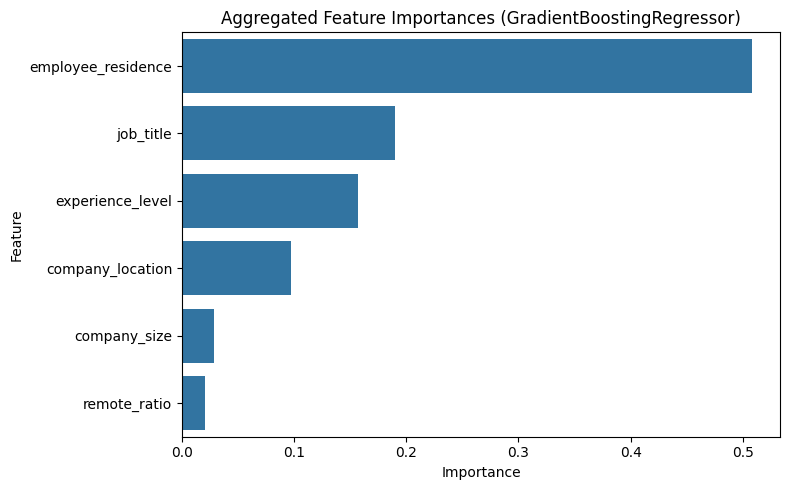

In [541]:
# ========================
# 7. Aggregate feature importances by original feature
# ========================
# Get one-hot encoded feature names
ohe = preprocessor.named_transformers_["cat"]
ohe_features = ohe.get_feature_names_out(categorical_cols)
all_features = list(ohe_features) + numeric_cols


# Map one-hot columns back to original feature
def map_to_original(feature_name):
    for col in categorical_cols:
        if feature_name.startswith(col + "_"):
            return col
    if feature_name in numeric_cols:
        return feature_name
    return feature_name


original_features = [map_to_original(f) for f in all_features]

# Aggregate importances
feature_importance_salaries_data_frame = (
    pd.DataFrame({"feature": original_features, "importance": gradient_boosting_regressor_model.feature_importances_})
    .groupby("feature")
    .sum()
    .sort_values(by="importance", ascending=False)
    .reset_index()
)

print("\n=== Aggregated Feature Importances ===")
print(feature_importance_salaries_data_frame)

# ========================
# 8. Visualize aggregated feature importances
# ========================
plt.figure(figsize=(8, 5))
sns.barplot(x="importance", y="feature", data=feature_importance_salaries_data_frame)
plt.title("Aggregated Feature Importances (GradientBoostingRegressor)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### Unupervised Learning

- **Cluster 0 – High-paying specialists**
  - Mean salary: ~$221,000 | Median: ~$207,000  
  - Dominated by senior data scientists  
  - Low remote ratio (~16%) → suggests in-person presence is valued for leadership/strategic roles  

- **Cluster 1 – Well-paid engineers**
  - Mean salary: ~$159,000 | Median: ~$160,000  
  - Dominated by senior data engineers  
  - Moderate remote ratio (~46%) → mix of on-site and remote flexibility  
  - Strong pay despite less emphasis on being fully on-site  

- **Cluster 2 – Mid-level data scientists**
  - Mean salary: ~$59,000 | Median: ~$58,000  
  - Mostly mid-level employees  
  - High remote ratio (~68%) → remote work more common but at lower pay  
  - Lowest salary group, influenced by experience and geography  

- **Cluster 3 – Remote senior engineers**
  - Mean salary: ~$112,000 | Median: ~$113,000  
  - Dominated by senior data engineers  
  - Very high remote ratio (~78%) → proves seniority allows strong pay even in remote-heavy roles  

- **Key insights**
  - Seniority is the strongest driver of higher pay.  
  - Data scientists sit at the top of the salary spectrum.  
  - Data engineers are slightly lower but remain well-compensated.  
  - Remote-heavy roles cluster at lower pay, except for senior engineers who maintain strong earnings.  
  - Suggests a trade-off: mid-level employees may gain flexibility but earn less, while senior roles secure both compensation and remote benefits.  

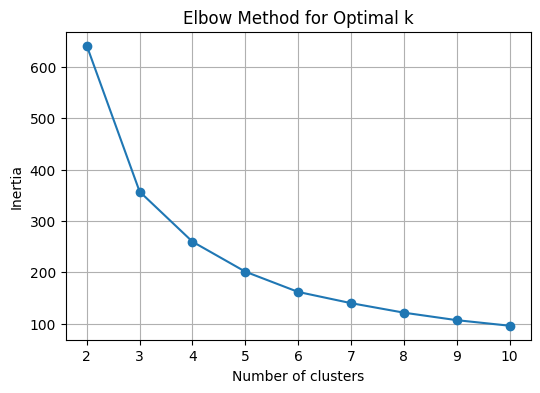

Silhouette Score: 0.4416


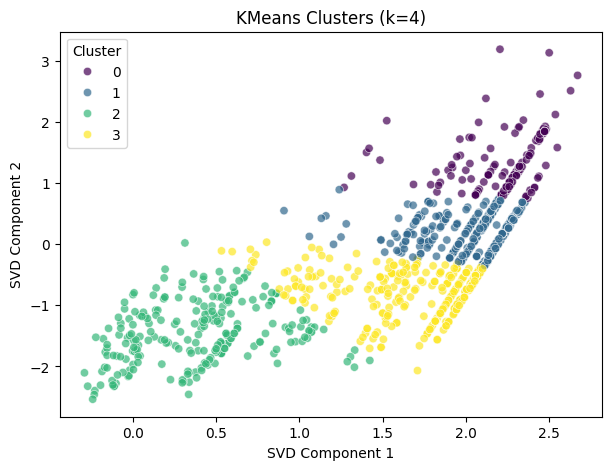


=== Cluster Summary ===
   Cluster    salary_mean  salary_median  count top_experience         top_job  avg_remote_ratio
0        0  221270.525547       206699.0    137             SE  Data Scientist         15.693431
1        1  158719.784615       160000.0    325             SE   Data Engineer         46.153846
2        2   58654.820408        58000.0    245             MI  Data Scientist         67.551020
3        3  112007.359133       113476.0    323             SE   Data Engineer         77.708978


In [542]:
# ========================
# 1. Import Libraries
# ========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score

# ========================
# 3. Select Features for Clustering
# ========================
# You can adjust based on your goals
features = [
    "experience_level",
    "job_title",
    "employee_residence",
    "remote_ratio",
    "company_location",
    "company_size",
    "salary_in_usd",
]

X = salaries_data_frame[features]

# Separate categorical & numeric columns

categorical_cols = [
    "experience_level",
    "job_title",
    "employee_residence",
    "company_location",
    "company_size",
]
numeric_cols = ["remote_ratio", "salary_in_usd"]


# ========================
# 4. Preprocessing Pipeline
# ========================
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols),
    ]
)

# ========================
# 5. Dimensionality Reduction with TruncatedSVD
# ========================
# Keep only first 2 components for visualization
svd = TruncatedSVD(n_components=2, random_state=42)

# Full preprocessing + dimensionality reduction pipeline
pipeline_svd = Pipeline(steps=[("preprocess", preprocessor), ("svd", svd)])

X_reduced = pipeline_svd.fit_transform(X)

# ========================
# 6. Determine Optimal Clusters (Elbow Method)
# ========================
inertia_values = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_reduced)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia_values, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# ========================
# 7. Fit Final KMeans Model
# ========================
optimal_k = 4  # Choose based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_reduced)
salaries_data_frame["Cluster"] = clusters

# ========================
# 8. Silhouette Score
# ========================
sil_score = silhouette_score(X_reduced, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

# ========================
# 9. Visualize Clusters
# ========================
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=X_reduced[:, 0], y=X_reduced[:, 1], hue=clusters, palette="viridis", alpha=0.7
)
plt.title(f"KMeans Clusters (k={optimal_k})")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.legend(title="Cluster")
plt.show()

# ========================
# 10. Cluster Insights
# ========================
cluster_summary = (
    salaries_data_frame.groupby("Cluster")
    .agg(
        salary_mean=("salary_in_usd", "mean"),
        salary_median=("salary_in_usd", "median"),
        count=("salary_in_usd", "count"),
        top_experience=("experience_level", lambda x: x.value_counts().index[0]),
        top_job=("job_title", lambda x: x.value_counts().index[0]),
        avg_remote_ratio=("remote_ratio", "mean"),
    )
    .reset_index()
)

# Show all columns without line wrapping
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.expand_frame_repr", False)  # Don't wrap to multiple lines

print("\n=== Cluster Summary ===")
print(cluster_summary)